In [21]:
# load in the libraries we'll need
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)

In [22]:
file=read.csv("C:\\Users\\abine\\Dropbox\\College\\Semester 2\\S2 Work\\Prog for DS in R\\5. NLP\\news.csv")
head(file)

X
1 0
2 1
3 2
4 3
5 4
6 5
  authors                                                                                                           
1 ['Cbc News']                                                                                                      
2 ['Cbc News']                                                                                                      
3 ['The Associated Press']                                                                                          
4 ['Cbc News']                                                                                                      
5 ['Cbc News']                                                                                                      
6 ['Mark Gollom Is A Toronto-Based Reporter With Cbc News. He Covers Canadian', 'U.S. Politics', 'Current Affairs.']
  title                                                               
1 Coronavirus a 'wake-up call' for Canada's prescription drug supply  
2 Yukon gov't names 2 possible sources of coronavirus exposure        
3 U.S. Senate passes $2T coronavirus relief package                   
4 Coronavirus: The latest in drug treatment and vaccine development   
5 The latest on the coronavirus outbreak for March 26                 
6 'Worse' pandemic on horizon unless world deals with wildlife markets
  publish_date       
1 2020-03-27 08:00:00
2 2020-03-27 01:45:00
3 2020-03-26 05:13:00
4 2020-03-27 00:36:00
5 2020-03-26 20:57:00
6 2020-03-27 08:00:00
  description                                                                                                                                                                                                                                             
1 Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply chains have been disrupted by the spread of COVID-19.
2 The Yukon government has identified two places in Whitehorse â\200” a church and a dental clinic â\200” where people may have been exposed to the coronavirus in recent weeks.                                                                                
3 The Senate has passed an unparalleled $2.2 trillion economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic                                                                            
4 Scientists around the world are racing to find novel ways to treat, mitigate or prevent infection from the novel coronavirus. Here are the latest developments.                                                                                         
5 The latest on the coronavirus outbreak from CBC News for Thursday, March 26                                                                                                                                                                             
6 The continued existenceÂ of wildlife markets, which areÂ considered potential breeding grounds for the spread of harmful viruses, means it's just a matter of time before the world is hit with another deadly pandemic, some scientists suggest.       
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

This dataset contains articles on corona virus 2019(COVID19) from various news portals

Our objective is to check the sentiment of each article

In [23]:
file=file['text']
head(file)

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Took out just the aricles from the major datset

In [24]:
file=as.data.frame(file)
head(file[1,1])
fileText=file[1,1]

[1] Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply chains have been disrupted by the spread of COVID-19. Provincial regulatory colleges are complying with the Canadian Pharmacists Association call to limit the amount of medications given to patients to 30-dayÂ supplies. The goal is to stop people from refilling prescriptions early and to ensure life-saving drugs don't run short when supply chains areÂ vulnerable. Mina Tadrous is a pharmacist and researcher in Toronto who monitors pharmaceutical supplies. He is worried Canadians will start stockpiling drugs after watching what has been unfolding in the U.S. and other regions as the virus spreads.Â  He said pharmacists are concerned about drugs such as life-saving inhalers that people might stockpile based on misinformation circulating about potential treatments for COVID-19. "It's that relationship of how people are reacting rather than the actual supply of medications," he said.Â  Tadrous said pharmacies get their medications and supplies from wholesalers, who get theirs from distributors who source them from manufacturers. Outside of wholesalers, most of thatÂ supply chain is outside of Canada.Â  Ongoing shortages Dr. Jacalyn Duffin of Queen's University in Kingston, Ont., has long warned about the increasing frequency of drug shortages, including nearly 2,000 ongoing shortages, none of which she attributes to coronavirus. China and India produce 80 per cent of the active ingredients of prescription drugs sold in North America, said Dr. Jacalyn Duffin. (Kas Roussy/CBC) Given that China and India produce 80 per cent of the active ingredients of prescription drugs sold in North America, supply disruptions are expected eventually, Duffin said. "I think that the coronavirus outbreak is a big wake-up call for us to pay attention to our drug shortages that exist already and to pay attention to where our drugs come from," she said. What you need to know about getting new prescriptions, refillsNew Brunswick offers relief on prescription co-pays during outbreak India, a major supplier of generic drugs to Europe, has already shut down the export of some antibiotics and drugs for hypertension, blood pressure and acetaminophen, Duffin said. As a precaution, the federal government has enacted sweeping legislation that gives it the right to force patented drugmakers to make more medicine if necessary and remove patents as part of the response to the public health emergency.Â 
2755 Levels:   All schools, universities, daycares and CEGEPsÂ in QuebecÂ will be closed for two weeks starting Monday.   The government is asking people not to call 811 if they suspect they have COVID-19. Instead, they should callÂ 1-877-644-4545.   Quebec now has 17 confirmed cases of COVID-19, with another 266 people under investigation.   The STM says the risk of transmission on public transit is still low and will therefore keep running as usual.   The STM is asking that anyone who has symptoms stay off public transit, and that people modify their work schedule to avoid large crowds at rush hour.   A respirologist at the Centre hospitalier de l'UniversitÃ© de MontrÃ©alÂ (CHUM) who saw patients has tested positive for COVID-19.   Hospitals and long-term care facilities in Montreal areÂ restricting visitors,Â and some areÂ banning them entirely.   Montreal is closingÂ arenas, libraries, pools and sports centres as well as the PlanetariumÂ and the Botanical Garden. Public transit will continue operating.Â    The Quebec Superior Court and Quebec CourtÂ are suspending some of their activities until further notice. During this period, only urgent requests will be processed.Â    The Quebec government is banning all indoor events with more than 250 people.   People coming from outside the countryÂ or anyone with flu-like symptomsÂ should self-isolate for 14 days.  ClickÂ here

Took out just the news

In [25]:
fileText <- gsub("\\$", "", fileText)

Removed $ symbols

In [26]:
tokens <- data_frame(text = fileText) %>% unnest_tokens(word, text)
head(tokens)

word      
1 canadian  
2 pharmacies
3 are       
4 limiting  
5 how       
6 much

Now that we have a list of tokens, we need to compare them against a list of words with either positive or negative sentiment.

In [27]:
sentiment <- tokens %>%
inner_join(get_sentiments("bing")) %>% # pull out only sentimen words
count(sentiment) %>% # count the # of positive & negative words
spread(sentiment, n, fill = 0) %>% # made data wide rather than narrow
mutate(sentiment = positive - negative)  # # of positive words - # of␣,→ negative owrds
sentiment

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsJoining, by = "word"

negative positive sentiment
1 8        3        -5

So this text has 8 negative polarity words and 3 positive polarity words. This means that there are 5 more negative than positive words in this text. Now that we know how to get the sentiment for a given text, let’s write a function to do this more quickly and easily and then apply that function to every text in our dataset.

In [29]:
# get the file
# read in the  file
preprocessing<-function(){
file=read.csv("C:\\Users\\abine\\Dropbox\\College\\Semester 2\\S2 Work\\Prog for DS in R\\5. NLP\\news.csv")
file=file["text"]
file=as.data.frame(file)
return (file)
}

In [30]:
# write a function that takes the name of a file and returns the # of postive
# sentiment words, negative sentiment words, the difference & the normalized␣,→ difference
GetSentiment <- function(file,i=1){
preprocessing()
fileText=file[i,1]
# remove any dollar signs (they're special characters in R)
fileText <- gsub("\\$", "", fileText)
# tokenize
tokens <- data_frame(text = fileText) %>% unnest_tokens(word, text)
# get the sentiment from the first text:
sentiment <- tokens %>%
inner_join(get_sentiments("bing")) %>% # pull out only sentimen words
count(sentiment) %>% # count the # of positive & negative words
spread(sentiment, n, fill = 0) %>% # made data wide rather than narrow
mutate(sentiment = positive - negative)
return(sentiment)
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [33]:
GetSentiment(file,i=5)

Joining, by = "word"

negative positive sentiment
1 35       40       5

So this text has 35 negative polarity words and 40 positive polarity words. This means that there are 5 more positive than negative words in this text. Now that we know how to get the sentiment for a given text, let’s write a function to do this more quickly and easily and then apply that function to every text in our dataset.

In [40]:
sentiments <- data_frame()
for(i in 1:40){
sentiments <- rbind(sentiments, GetSentiment(file,i))
}

Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"Joining, by = "word"

In [41]:
sentiments=sentiments["sentiment"]
summary(sentiments)
sentiments

   sentiment     
 Min.   :-69.00  
 1st Qu.:-12.75  
 Median : -1.50  
 Mean   : -7.00  
 3rd Qu.:  3.25  
 Max.   : 33.00  

sentiment
1   -5      
2   -5      
3   -1      
4    3      
5    5      
6  -23      
7  -43      
8   -1      
9  -20      
10   3      
11   1      
12   5      
13   8      
14  -1      
15  10      
16 -19      
17   2      
18 -64      
19 -12      
20  -8      
21   4      
22   3      
23 -24      
24  -2      
25   4      
26 -15      
27  10      
28   2      
29  -1      
30 -18      
31  -5      
32   9      
33  -2      
34  -7      
35 -69      
36 -32      
37  -7      
38  11      
39  -9      
40  33

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


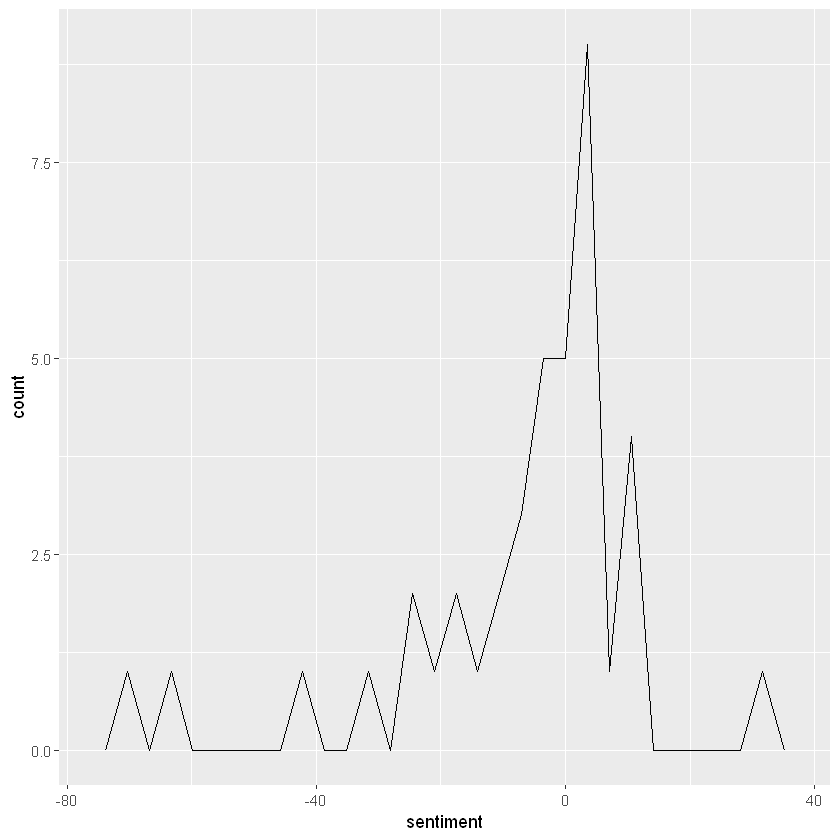

In [42]:
ggplot(sentiments,aes(sentiment))+geom_freqpoly()

Lot of articles are Nuetral,and most of them falls into negative sentiments and only few positive sentiment articles

We can clearly find that most of the articles on COVID 19 has either Ngative or Neutral sentiments.